# Estadistica para negocios

En este modulo, revisaremos algunas capacidades de Python y `pandas` muestreo, ademas del manejo de distribuciones de probabilidad.

En primer lugar, importaremos los modulos necesarios:

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import norm, chi2, t, f

El modulo `pandas` ya es conocido: permite manipular bases de datos. Por otro lado, `scipy` es la implementacion de Python para analisis numerico. El modulo `scipy.stats` contiene las distribuciones de probabilidad mas conocidas.

Abriremos la base de datos `base_ventas.xlsx` que esta en la carpeta. Esta base de datos contiene informacion de 473 trabajadores de una empresa de retail. Las variables de la base de datos son:

- `ventas`: Ventas del trabajador en el ultimo periodo
- `capacitacion`: Variable igual a 1 si el trabajador esta capacitado
- `edad`: Edad en años
- `educ`: Escolaridad en años

La siguiente linea de codigo abre la base de datos y la guarda en un elemento llamado `df`:

In [20]:
df = pd.read_excel('base_ventas.xlsx')
df

,ventas,capacitacion,edad,educ
0,9.141866e+05,1,38,10.0
1,8.306136e+05,0,45,12.0
2,4.604594e+05,0,41,11.0
3,5.377235e+05,0,42,10.0
4,8.912407e+05,0,39,13.0
...,...,...,...,...
468,1.589913e+06,0,44,15.5
469,3.317825e+06,1,43,12.0
470,9.670738e+05,1,38,12.0
471,1.137940e+06,1,35,10.0


## Muestreo usando `pandas`

Pandas permite facilmente tomar una muestra desde una base de datos especifica utilizando el metodo `sample()`

Existen dos opciones de muestra:

- Tomar una muestra de `n` individuos: Para ello, usamos la opcion `n=...`.
- Tomar una muestra de un porcentaje determinado. Para ello, usamos la opcion `frac=...`.

Por ejemplo, para tomar una muestra aleatoria del 10% de los individuos:

In [21]:
sample_1 = df.sample(frac=0.1)
sample_1

,ventas,capacitacion,edad,educ
335,1.391336e+05,0,34,12.0
47,2.453437e+06,0,39,12.0
197,5.233102e+05,1,34,12.0
314,2.543877e+06,0,47,11.0
118,7.632948e+05,0,51,11.0
333,7.397811e+05,0,42,11.0
204,1.306745e+06,0,39,12.0
451,4.988670e+06,0,46,12.0
468,1.589913e+06,0,44,15.5
300,1.798755e+05,1,34,13.3


Otra opcion es tomar **muestras agrupadas**. En este caso, se debe primero agrupar la base de datos. Para ello, usaremos el metodo `groupby()`. Por ejemplo, para agrupar por la variable `'edad'`:

In [22]:
df_grouped = df.groupby('edad')

Luego, usamos sample en la nueva base de datos. Por ejemplo, para obtener 1 individuo aleatorio de cada edad:

In [23]:
sample_2 = df_grouped.sample(n=1)
sample_2

,ventas,capacitacion,edad,educ
15,1.064159e+05,1,23,14.0
428,4.821812e+04,0,25,10.0
7,6.316939e+05,0,26,13.0
338,5.147287e+04,1,28,10.0
463,5.574509e+05,0,29,12.0
93,6.126383e+05,0,31,12.0
240,5.553146e+05,0,32,12.0
265,1.161015e+05,1,34,13.0
324,5.612152e+05,1,35,12.0
214,4.253553e+05,1,36,10.0


## Distribuciones de probabilidad clasicas:

### Distribucion normal

La distribucion normal es una de las distribuciones mas conocidas en la estadistica, y es frecuentemente observada en la naturaleza.

La funcion de distribucion (tambien conocida como funcion de densidad) es igual a:

$$ f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \cdot \exp \left( \frac{(x-\mu)^2}{-2 \sigma^2} \right) $$


#### Probando si los datos poseen una distribucion normal:

Usando la base de datos, graficaremos un histograma de la edad de las personas. Sin embargo, esta vez utilizaremos `matplotlib`. Este paquete permite realizar graficas mas avanzadas que las incluidas en pandas por defecto.

En primer lugar, cargaremos `matplotlib.pyplot`, y usaremos el pseudonimo `plt`

In [24]:
import matplotlib.pyplot as plt

Haremos un histograma simple. Para ello, usaremos la funcion `hist()` de `matplotlib`:

(array([  3.,   4.,  42.,  80., 112.,  93.,  71.,  45.,  18.,   5.]),
 array([23., 27., 31., 35., 39., 43., 47., 51., 55., 59., 63.]),
 <BarContainer object of 10 artists>)

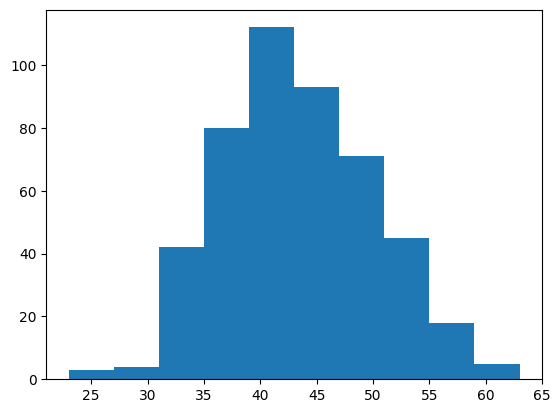

In [25]:
plt.hist(df['edad'])

Notar que este histograma muestra la frecuencia en el eje vertical. Para comparar este histograma con una distribucion normal, debemos expresarlo en terminos de _densidad_. Para ello, usaremos la opcion `density=True`:

(array([0.00158562, 0.00211416, 0.02219873, 0.0422833 , 0.05919662,
        0.04915433, 0.03752643, 0.02378436, 0.00951374, 0.00264271]),
 array([23., 27., 31., 35., 39., 43., 47., 51., 55., 59., 63.]),
 <BarContainer object of 10 artists>)

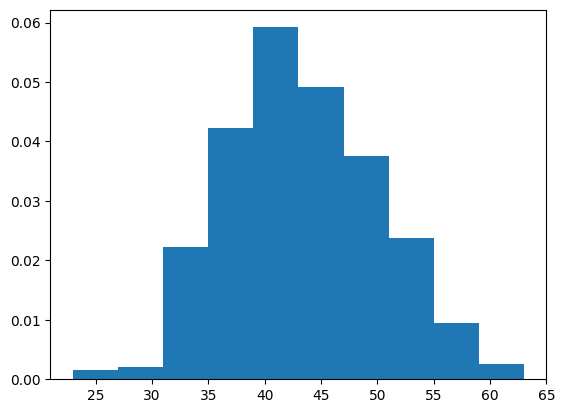

In [26]:
plt.hist(df['edad'],density=True)

Al parecer, la edad tiene una distribucion normal. Para confirmar, graficaremos una funcion de distribucion normal sobre este histograma.

Primero, necesitamos la media y la desviacion estandar de la edad:

In [27]:
edad_mean = df['edad'].mean()
edad_sd = df['edad'].std()

print(edad_mean)
print(edad_sd)

42.987315010570825
6.676851595228896


Luego, crearemos una linea de puntos entre 25 y 65, que representa el rango de la edad en años:

In [28]:
x = np.linspace(25,65,100)

Ahora, crearemos los puntos de la distribucion normal usando la funcion `norm()` de `scipy`. Esta funcion requiere los siguientes argumentos:

- `loc`: la media de la distribucion
- `scale`: la desviacion estandar

Luego de esto, debemos usar el metodo `pdf()` para crear los puntos de la funcion de distribucion, en el rango de la edad:

In [31]:
y = norm(loc=43,scale=6.67).pdf(x)

Una vez creados los puntos, podemos usar `matplotlib` para graficar el histograma y la distribucion normal:

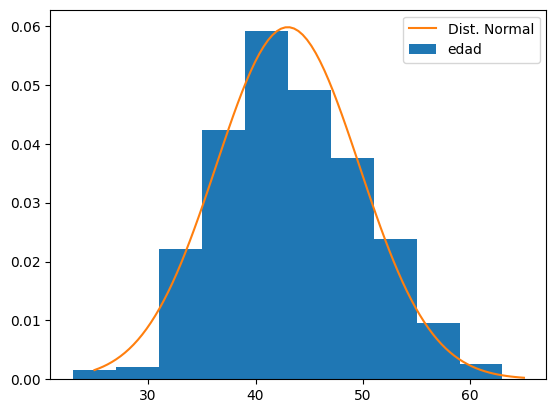

In [37]:
# Crearemos una figura de matplotlib de 1 elemento (1x1)
fig, ax = plt.subplots(1,1)

# Luego, crearemos el histograma
ax.hist(df['edad'],density=True)

# Ahora dibujamos la curva de la distribucion normal
ax.plot(x,y)

# Finalmente, agregaremos una leyenda
plt.legend(['Dist. Normal','edad'])

#### Graficar la distribucion acumulada

Para graficar la distribucion acumulada, usaremos el metodo `cdf()`:

In [38]:
y = norm(loc=43,scale=6.67).cdf(x)

Luego, graficamos:

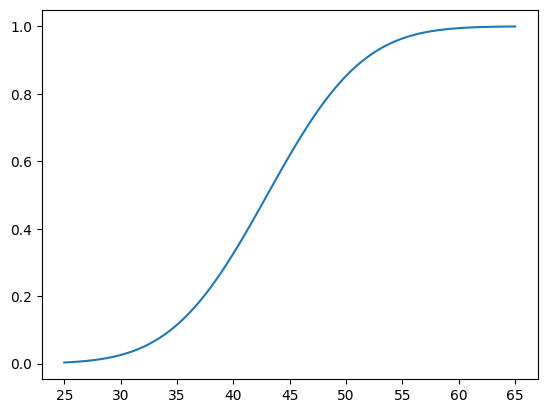

In [39]:
# Crearemos una figura de matplotlib de 1 elemento (1x1)
fig, ax = plt.subplots(1,1)

# Ahora dibujamos la curva de la distribucion acumulada normal
ax.plot(x,y)


#### Graficar la distribucion normal a distintos niveles de $\mu$

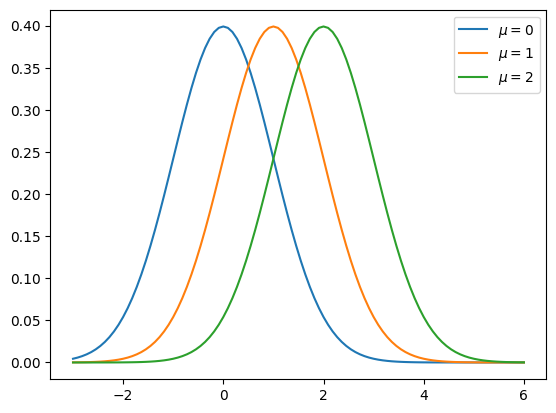

In [40]:
# Generar distribucion normal a distintos niveles de mu
x = np.linspace(-3,6,100)
y0 = norm.pdf(x,loc=0)
y1 = norm.pdf(x,loc=1)
y2 = norm.pdf(x,loc=2)

# Generar figura
fig, ax = plt.subplots(1,1)
ax.plot(x,y0)
ax.plot(x,y1)
ax.plot(x,y2)

# Leyenda
plt.legend([r'$\mu = 0$',r'$\mu = 1 $',r'$\mu = 2$'])

#### Graficar la distribucion normal a distintos niveles de $\sigma$

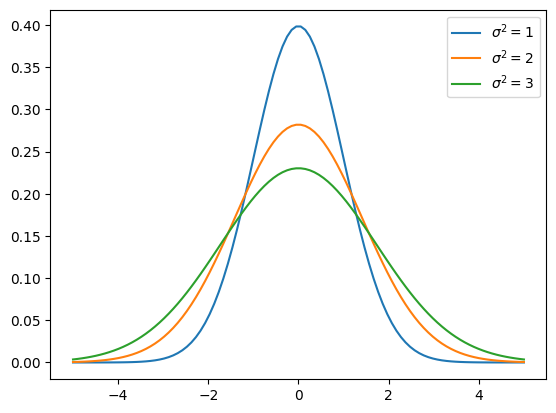

In [41]:
# Generar distribucion normal a distintos niveles de sigma
x = np.linspace(-5,5,100)
y1 = norm.pdf(x,scale=1)
y2 = norm.pdf(x,scale=np.sqrt(2))
y3 = norm.pdf(x,scale=np.sqrt(3))

# Generar figura
fig, ax = plt.subplots(1,1)
ax.plot(x,y1)
ax.plot(x,y2)
ax.plot(x,y3)

# Leyenda
plt.legend([r'$\sigma^2 = 1$',r'$\sigma^2 = 2 $',r'$\sigma^2 = 3$'])

#### Distribucion Chi-cuadrada:

La distribucion Chi-cuadrada se genera a partir de la suma de variables aleatorias que distribuyen normal estandar:

$$ X = \sum_{i=1}^{n} Z_i^2 \sim \chi^2 (n)$$

Para graficar la distribucion chi-cuadrada, usamos la funcion `chi2()` de `scipy`, de forma similar a antes:

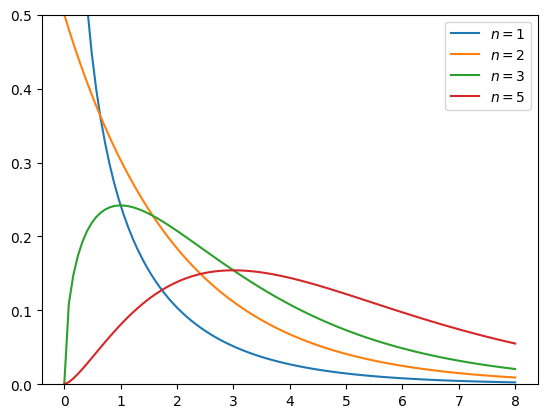

In [42]:
# Generar distribucion chi cuadrada
x = np.linspace(0,8,100)
y1 = chi2.pdf(x,1)
y2 = chi2.pdf(x,2)
y3 = chi2.pdf(x,3)
y4 = chi2.pdf(x,5)

# Generar figura
fig, ax = plt.subplots(1,1)
ax.plot(x,y1)
ax.plot(x,y2)
ax.plot(x,y3)
ax.plot(x,y4)
ax.set_ylim([0,0.5])

# Leyenda
plt.legend([r'$n = 1$',r'$n = 2 $',r'$n = 3$',r'$n = 5$'])

#### Distribucion t de Student

Se construye a partir de una variable $X_1$ con distribucion normal estandar, y una variable $X_2$ con distribucion chi-cuadrada:

$$ T = \frac{X_1}{\sqrt{\frac{X_2}{v}}} \sim t_{v} $$

Para graficar la distribucion chi-cuadrada, usaremos la funcion `t()` de `scipy`, en forma similar a anteriormente:

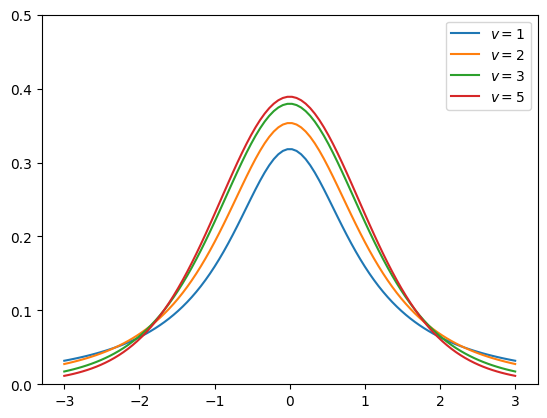

In [43]:
# Generar distribucion t
x = np.linspace(-3,3,100)
y1 = t.pdf(x,1)
y2 = t.pdf(x,2)
y3 = t.pdf(x,5)
y4 = t.pdf(x,10)

# Figura
fig, ax = plt.subplots(1,1)
ax.plot(x,y1)
ax.plot(x,y2)
ax.plot(x,y3)
ax.plot(x,y4)
ax.set_ylim([0,0.5])

# Leyenda
plt.legend([r'$v = 1$',r'$v = 2 $',r'$v = 3$',r'$v = 5$'])

#### Distribucion F de Fisher

La distribucion F de Fisher es la division de dos variables aleatorias $X_1$ y $X_2$ con distribucion chi-cuadrada, dividido por los respectivos grados de libertad:

$$ F = \frac{X_1 / v_1}{X_2 / v_2} \sim F_{v_1,v_2} $$

Para graficar la distribucion F, podemos usar la funcion `f()` de Scipy, de forma similar:

In [ ]:
# Generar distribucion t
x = np.linspace(0,5,100)
y1 = f.pdf(x,1,1)
y2 = f.pdf(x,1,2)
y3 = f.pdf(x,2,2)
y4 = f.pdf(x,10,10)

fig, ax = plt.subplots(1,1)
ax.plot(x,y1)
ax.plot(x,y2)
ax.plot(x,y3)
ax.plot(x,y4)
ax.set_ylim([0,1])

plt.legend([r'$v_1 = 1, v_2 = 1$',r'$v_1 = 1, v_2 = 2$',r'$v_1 = 2, v_2 = 2$',r'$v_1 = 10, v_2 = 10$'])